In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from astropy.wcs import WCS
from spectral_cube import SpectralCube
from reproject import reproject_interp
from matplotlib.colors import ListedColormap, BoundaryNorm
from astropy import units as u
from astropy.coordinates import SkyCoord
# gal = Galactic Co-ordinates
hdu_hi4pi_gal = fits.open('/srv/data/hi4pi/CAR.fits')

header_hi4pi_gal = hdu_hi4pi_gal[0].header
wcs_hi4pi_gal = WCS(header_hi4pi_gal)
hi4pi_gal = hdu_hi4pi_gal[0].data
hi4pi_gal.shape

(945, 2163, 4323)

In [2]:
# eq = Equitorial Co-ordinates 
hdu_chimeStokesQ_eq = fits.open('/srv/data/chime/chime_QU_Sep2023/Q_600_800_Sept2023_new_gal_fix.fits')
hdu_chimeStokesU_eq = fits.open('/srv/data/chime/chime_QU_Sep2023/U_600_800_Sept2023_new_gal_fix.fits')
header_chime_eq = hdu_chimeStokesU_eq[0].header
wcs_chime_eq = WCS(header_chime_eq)
chimeStokesQ_eq = hdu_chimeStokesQ_eq[0].data
chimeStokesU_eq = hdu_chimeStokesU_eq[0].data
print(chimeStokesQ_eq.shape)


(512, 1440, 2880)


In [3]:
countour_stokes_U, footprint = reproject_interp((chimeStokesU_eq[475],wcs_chime_eq.celestial), wcs_hi4pi_gal.celestial, (2163, 4323))

In [4]:
xpix_gal, ypix_gal = wcs_hi4pi_gal.celestial.wcs_world2pix(137.45706817862768,7.06094581066827, 1)
xpix_gal = np.fix(xpix_gal)
ypix_gal = np.fix(ypix_gal)
xpix_gal, ypix_gal


xhead_h4,         yhead_h4 = wcs_hi4pi_gal.celestial.wcs_world2pix(137.1,7.1, 1)
xhead_h4 =    int(xhead_h4)
yhead_h4 =    int(yhead_h4)


xtail_h4,         ytail_h4 = wcs_hi4pi_gal.celestial.wcs_world2pix(134,6.6, 1)
xtail_h4 =    int(xtail_h4)
ytail_h4 =    int(ytail_h4)

xoff_h4,           yoff_h4 = wcs_hi4pi_gal.celestial.wcs_world2pix(135,9.5, 1)
xoff_h4 =      int(xoff_h4)
yoff_h4 =      int(yoff_h4)


In [5]:
# eq = Equitorial Co-ordinates
hdu_chimeStokesQ_eq = fits.open('/srv/data/chime/chime_FD_Oct2022/Q_600_800_Nov252022_fix_gal.fits')
hdu_chimeStokesU_eq = fits.open('/srv/data/chime/chime_FD_Oct2022/U_600_800_Nov252022_fix_gal.fits')
header_chime_eq = hdu_chimeStokesU_eq[0].header
wcs_chime_eq = WCS(header_chime_eq)
chimeStokesQ_eq = hdu_chimeStokesQ_eq[0].data
chimeStokesU_eq = hdu_chimeStokesU_eq[0].data
print(chimeStokesQ_eq.shape)

countour_pol_angle= 0.5*np.arctan2(chimeStokesU_eq[474] , chimeStokesQ_eq[475] )# calculating polarization angle
#extremely ineffecient way to create desired contour
countour_pol_angle[400:] = np.nan
countour_pol_angle[:380] = np.nan
countour_pol_angle[:, 210:] = np.nan
countour_pol_angle[:384,203:] = np.nan
countour_pol_angle[390:,205:] = np.nan
countour_pol_angle[385:392, 168:175] = np.nan
countour_pol_angle[385:390, 167:175] = np.nan

countour_pol_angled, footprint = reproject_interp((countour_pol_angle,wcs_chime_eq.celestial), wcs_hi4pi_gal.celestial, (2163, 4323))

(512, 720, 1440)


In [6]:
xpix_gal, ypix_gal = wcs_hi4pi_gal.celestial.wcs_world2pix(137.45706817862768,7.06094581066827, 1)
xpix_gal = np.fix(xpix_gal)
ypix_gal = np.fix(ypix_gal)
xpix_gal, ypix_gal

s=180
ymin=ypix_gal-s; ymax=ypix_gal+s; xmin=xpix_gal-s; xmax=xpix_gal+s;


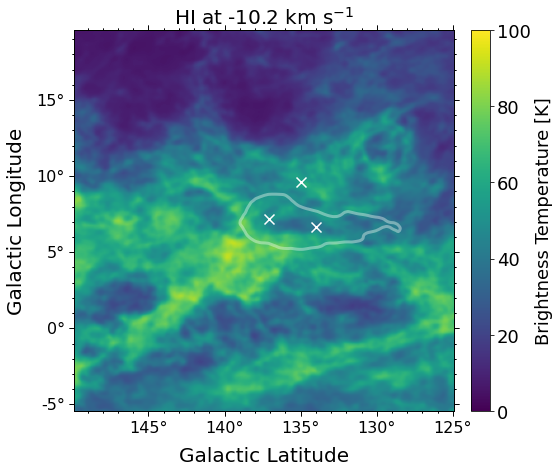

In [8]:
fig=plt.figure(figsize=(15,7))
ax = fig.add_subplot((111), projection=wcs_hi4pi_gal.celestial, slices=('x', 'y'))
im = ax.imshow(hi4pi_gal[460+4], cmap='viridis', vmin=0, vmax=100)

ax.scatter(xhead_h4,  yhead_h4, c='white', s=100, marker='x', zorder=10)
ax.scatter(xtail_h4,  ytail_h4, c='white', s=100, marker='x', zorder=10)
ax.scatter( xoff_h4,   yoff_h4,   c='white', s=100, marker='x', zorder=10)

levels = [-np.pi/8]  # Define contour levels to use
ax.contour(countour_pol_angled, cmap='Greens', alpha=0.4, levels=levels, zorder=40, linewidths=3)#, linestyles='-.')     # creating contour


ax.set_xlabel("Galactic Latitude", fontsize=20)
ax.set_ylabel("Galactic Longitude", fontsize=20)

ax.tick_params(axis='both', which='major', labelsize=16, zorder=30, length=5)
ax.coords[0].display_minor_ticks(True)
ax.coords[1].display_minor_ticks(True)
ax.coords.frame.set_linewidth(1)
s=30
ax.set_ylim(ymin+s, ymax-s)
ax.set_xlim(xmin+s, xmax-s)
v_rad = wcs_hi4pi_gal.wcs_pix2world(1,1,460+4, 1)[2]
ax.set_title(r'HI at -10.2 km s$^{-1}$', fontsize=20)


cbar = plt.colorbar(im, ax=ax, shrink=1, pad=0.02)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Brightness Temperature [K]', fontsize=18)
#plt.savefig('/home/nmohamme/Fall2023/Paper_update/figures/N_HI.png', bbox_inches='tight', pad_inches=0.1)